In [1]:
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt

In [2]:
fcds_eval = pd.read_csv('gpt-4_results_fcds_clean.csv')
chem_eval = pd.read_csv('gpt-4_results_chem_clean.csv')

In [3]:
fcds_eval.iloc[39]

question                   How does model selection with hyperparameter ...
gramatical_accuracy                                                       1
ambiguous_or_unclear                                                      1
gratuitous_information                                                    0
pedagogical_value                                                         1
covers_key_concept                                                        1
concept_covered           Model Selection with Hyperparameter Tuning: Th...
question_grade                                                            2
Name: 39, dtype: object

In [4]:
grouped = chem_eval.groupby('question_grade').sum()

# Add count of questions with that grade
grouped['total_questions'] = chem_eval.groupby('question_grade').size()

# Keeping only relevant columns and reseting the index for better view
final_table = grouped[['total_questions', 'gramatical_accuracy', 'ambiguous_or_unclear', 
                       'gratuitous_information', 'pedagogical_value', 'covers_key_concept']].reset_index()
grade_mapping = {0: 'Poor', 1: 'Fair', 2: 'Good'}
final_table['question_grade'] = final_table['question_grade'].replace(grade_mapping)

# Rename columns
new_column_names = {
    'question_grade': 'Grade',
    'total_questions': 'Question Count',
    'gramatical_accuracy': 'Grammatical Accuracy',
    'ambiguous_or_unclear': 'Ambiguous',
    'gratuitous_information': 'Gratuitous Info',
    'pedagogical_value': 'Pedagogical Value',
    'covers_key_concept': 'Key Concept Coverage'
}
final_table = final_table.rename(columns=new_column_names)
final_table['Grade'] = pd.Categorical(final_table['Grade'], categories=['Good', 'Fair', 'Poor'], ordered=True)

# Sort the dataframe based on the 'Grade' column
final_table = final_table.sort_values('Grade', ascending=True).reset_index(drop=True)
styled = final_table.style.hide(axis='index')
display(styled)
'''fig, ax = plt.subplots(figsize=(20, 8))  # You can adjust the size as needed

table(ax, final_table, loc='center')


# Hide the axis
ax.axis('off')

# Display the table
plt.show()'''

Grade,Question Count,Grammatical Accuracy,Ambiguous,Gratuitous Info,Pedagogical Value,Key Concept Coverage
Good,36,36,31,29,36,27
Fair,5,5,4,1,5,2
Poor,9,9,5,4,3,1


"fig, ax = plt.subplots(figsize=(20, 8))  # You can adjust the size as needed\n\ntable(ax, final_table, loc='center')\n\n\n# Hide the axis\nax.axis('off')\n\n# Display the table\nplt.show()"

In [5]:
styled.to_latex('chem_table.tex')

In [6]:
sampled_questions = chem_eval.groupby('question_grade').apply(lambda x: x.sample(3)).reset_index(drop=True)

# Display the sampled questions
grade_mapping = {0: 'Poor', 1: 'Fair', 2: 'Good'}
sampled_questions['question_grade'] = sampled_questions['question_grade'].replace(grade_mapping)
sampled_questions['question_grade'] = pd.Categorical(sampled_questions['question_grade'], categories=['Good', 'Fair', 'Poor'], ordered=True)

# Sort the dataframe based on the 'Grade' column
sampled_questions = sampled_questions.sort_values('question_grade', ascending=True).reset_index(drop=True)
display(sampled_questions[['question_grade', 'question']])


,question_grade,question
0,Good,When is the last electron of main group elemen...
1,Good,How does the equilibrium vapor pressure of a l...
2,Good,How are cobalt compounds used to make blue pig...
3,Fair,Why are X-rays important in studying celestia...
4,Fair,What is the source of this information about m...
5,Fair,Why is the Periodic Table of Elements importa...
6,Poor,When does an object have high thermal energy?
7,Poor,How does completing the activity help you prep...
8,Poor,When did the supernova explosion that created...


In [7]:
pd.set_option('display.max_colwidth', 500)
#styled = sampled_questions.style.hide(axis='index')
new_column_names = {
    'question': 'Question',
    'question_grade': 'Grade',
    'total_questions': 'Question Count',
    'gramatical_accuracy': 'Grammatical Accuracy',
    'ambiguous_or_unclear': 'Ambiguous',
    'gratuitous_information': 'Gratuitous Info',
    'pedagogical_value': 'Pedagogical Value',
    'covers_key_concept': 'Key Concept Coverage'
}
sampled_questions = sampled_questions.rename(columns=new_column_names)
sampled_questions = sampled_questions[['Grade', 'Question']]
styled = sampled_questions.style.hide(axis='index')

display(styled)
styled.to_latex('chem_questions.tex')

Grade,Question
Good,When is the last electron of main group elements added to an s or a p orbital in the outermost shell?
Good,How does the equilibrium vapor pressure of a liquid vary with temperature?
Good,How are cobalt compounds used to make blue pigments for jewelry or paints?
Fair,Why are X-rays important in studying celestial bodies like the Crab Nebula?
Fair,What is the source of this information about molecular compounds?
Fair,Why is the Periodic Table of Elements important in understanding phase changes?
Poor,When does an object have high thermal energy?
Poor,How does completing the activity help you prepare for the module quiz?
Poor,When did the supernova explosion that created the Crab Nebula occur?


In [8]:
fcds_comparison = fcds_eval.iloc[39:]
display(fcds_comparison.head())

,question,gramatical_accuracy,ambiguous_or_unclear,gratuitous_information,pedagogical_value,covers_key_concept,concept_covered,question_grade
39,How does model selection with hyperparameter tuning differ from regular model selection?,1,1,0,1,1,"Model Selection with Hyperparameter Tuning: This differs from the regular model selection in several ways. First, the input adds a hyperparameter space S, that brings more variability and complexity, as each model Mi will now have a range of variations defined by the hyperparameters. Second, the procedure becomes more complex, as it has an additional step where the best hyperparameters are chosen based on their performance on a validation subset. After that, a new model is trained using thes...",2
40,Why is the first step in gathering information to identify the stakeholders within the business?,1,0,0,1,1,"The concept most closely related to the question ""Why is the first step in gathering information to identify the stakeholders within the business?"" is: The first step in gathering information is to identify the stakeholders within the business.",1
41,Data preprocessing: How is data prepared for use during the EDA process and beyond?,1,1,0,1,1,"The concept most closely related to the question ""Data preprocessing: How is data prepared for use during the EDA process and beyond?"" is Data preprocessing: Preparing data for use during the EDA process and beyond.",2
42,Why is Naive Bayes not considered the go-to algorithm for estimating the probability of an observation's class?,1,1,0,1,1,"Naive Bayes is not considered the go-to algorithm for estimating the probability of an observation's class as it is biased in its results. Despite its simplicity and effectiveness in certain scenarios, it operates under the assumption that features are independent of each other which is not always the case in real-world applications. This naive assumption can lead to incorrect classifications and skewed results, making it not always the first choice for such tasks.",1
43,Discrimination: How can data science be discriminatory due to the nature of making predictions and classifications?,1,1,1,1,1,"The concept most closely related to the question ""Discrimination: How can data science be discriminatory due to the nature of making predictions and classifications?"" is Discrimination: Data science can be discriminatory due to the nature of making predictions and classifications, which can be skewed towards certain groups.",2


In [9]:
aryan_eval = pd.read_excel("Question_Evaluation (2).xlsx")
grade_mapping = {"Poor": 0, 'Fair':1, 'Good': 2}
aryan_eval['Question Evaluation'] = aryan_eval['Question Evaluation'].replace(grade_mapping)
aryan_eval = aryan_eval[0:40]
display(aryan_eval.head())

,Question,Rubric Item 1,Rubric Item 2,Rubric Item 3,Rubric Item 4,Rubric Item 5,Concept Covered (If any),Question Evaluation
0,1,1.0,1.0,0.0,1.0,1.0,Hyperparameter tuning,2.0
1,2,1.0,1.0,0.0,1.0,1.0,Requirements gathering,2.0
2,3,1.0,1.0,0.0,1.0,1.0,EDA,1.0
3,4,1.0,1.0,0.0,1.0,1.0,Naïve Bayes,2.0
4,5,1.0,1.0,1.0,0.0,1.0,Algorithmic Bias,0.0


In [10]:
fcds_comparison = fcds_comparison.reset_index(drop=True)
aryan_eval = aryan_eval.reset_index(drop=True)
gramatical_accuracy = (fcds_comparison['gramatical_accuracy'] == aryan_eval['Rubric Item 1']).sum()
ambiguous = (fcds_comparison['ambiguous_or_unclear'] == aryan_eval['Rubric Item 2']).sum()
gratuitous = (fcds_comparison['gratuitous_information'] == aryan_eval['Rubric Item 3']).sum()
pedagogical = (fcds_comparison['pedagogical_value'] == aryan_eval['Rubric Item 4']).sum()
concept = (fcds_comparison['covers_key_concept'] == aryan_eval['Rubric Item 5']).sum()
question_eval = (fcds_comparison['question_grade'] == aryan_eval['Question Evaluation']).sum()

print(f"Number of matching rows (grammar): {gramatical_accuracy}")
print(f"Number of matching rows (ambiguous): {ambiguous}")
print(f"Number of matching rows (gratuitous): {gratuitous}")
print(f"Number of matching rows (pedagogical): {pedagogical}")
print(f"Number of matching rows (covers concept): {concept}")
print(f"Number of matching rows (question grade): {question_eval}")

Number of matching rows (grammar): 39
Number of matching rows (ambiguous): 33
Number of matching rows (gratuitous): 9
Number of matching rows (pedagogical): 35
Number of matching rows (covers concept): 30
Number of matching rows (question grade): 26


In [11]:
print(len(fcds_comparison), len(aryan_eval))
print(fcds_comparison.index.equals(aryan_eval.index))

40 40
True


In [12]:
fcds_comparison.head()

,question,gramatical_accuracy,ambiguous_or_unclear,gratuitous_information,pedagogical_value,covers_key_concept,concept_covered,question_grade
0,How does model selection with hyperparameter tuning differ from regular model selection?,1,1,0,1,1,"Model Selection with Hyperparameter Tuning: This differs from the regular model selection in several ways. First, the input adds a hyperparameter space S, that brings more variability and complexity, as each model Mi will now have a range of variations defined by the hyperparameters. Second, the procedure becomes more complex, as it has an additional step where the best hyperparameters are chosen based on their performance on a validation subset. After that, a new model is trained using thes...",2
1,Why is the first step in gathering information to identify the stakeholders within the business?,1,0,0,1,1,"The concept most closely related to the question ""Why is the first step in gathering information to identify the stakeholders within the business?"" is: The first step in gathering information is to identify the stakeholders within the business.",1
2,Data preprocessing: How is data prepared for use during the EDA process and beyond?,1,1,0,1,1,"The concept most closely related to the question ""Data preprocessing: How is data prepared for use during the EDA process and beyond?"" is Data preprocessing: Preparing data for use during the EDA process and beyond.",2
3,Why is Naive Bayes not considered the go-to algorithm for estimating the probability of an observation's class?,1,1,0,1,1,"Naive Bayes is not considered the go-to algorithm for estimating the probability of an observation's class as it is biased in its results. Despite its simplicity and effectiveness in certain scenarios, it operates under the assumption that features are independent of each other which is not always the case in real-world applications. This naive assumption can lead to incorrect classifications and skewed results, making it not always the first choice for such tasks.",1
4,Discrimination: How can data science be discriminatory due to the nature of making predictions and classifications?,1,1,1,1,1,"The concept most closely related to the question ""Discrimination: How can data science be discriminatory due to the nature of making predictions and classifications?"" is Discrimination: Data science can be discriminatory due to the nature of making predictions and classifications, which can be skewed towards certain groups.",2


In [13]:
# This will create a pandas DataFrame that shows how often each combination of scores occurs.
contingency_table = pd.crosstab(fcds_comparison['question_grade'], aryan_eval['Question Evaluation'])

# You can print it to see its content.
print(contingency_table)


Question Evaluation  0.0  1.0  2.0
question_grade                    
0                      0    2    1
1                      1    3    6
2                      1    3   23


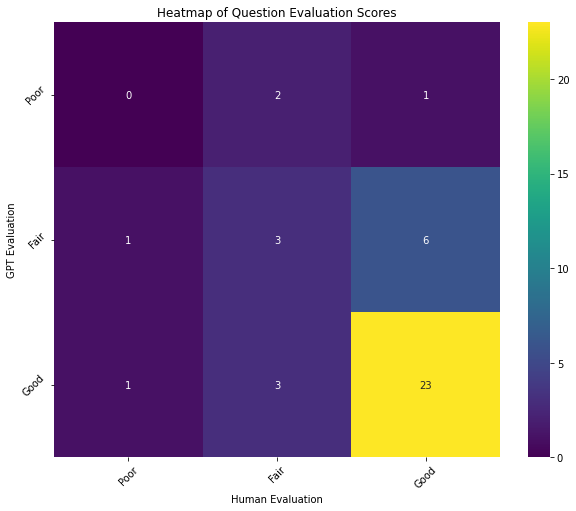

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')

# Add some labels and a title for clarity
plt.title('Heatmap of Question Evaluation Scores')

# Set the labels for the ticks
ax.set_xticklabels(['Poor', 'Fair', 'Good'])
ax.set_yticklabels(['Poor', 'Fair', 'Good'])

# Set the labels for the axes
plt.xlabel('Human Evaluation')
plt.ylabel('GPT Evaluation')

# Rotate the tick labels for aesthetics (optional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()



In [19]:
# Create a dictionary to hold the indices for each category
category_indices = {
    'poor_poor': [],
    'poor_fair': [],
    'poor_good': [],
    'fair_poor': [],
    'fair_fair': [],
    'fair_good': [],
    'good_poor': [],
    'good_fair': [],
    'good_good': [],
}

# Loop over the DataFrame and populate the dictionary
for index, (grade1, grade2) in enumerate(zip(fcds_comparison['question_grade'], aryan_eval['Question Evaluation'])):
    if grade1 == 0 and grade2 == 0:
        category_indices['poor_poor'].append(index)
    elif grade1 == 0 and grade2 == 1:
        category_indices['poor_fair'].append(index)
    elif grade1 == 0 and grade2 == 2:
        category_indices['poor_good'].append(index)
    elif grade1 == 1 and grade2 == 0:
        category_indices['fair_poor'].append(index)
    elif grade1 == 1 and grade2 == 1:
        category_indices['fair_fair'].append(index)
    elif grade1 == 1 and grade2 == 2:
        category_indices['fair_good'].append(index)
    elif grade1 == 2 and grade2 == 0:
        category_indices['good_poor'].append(index)
    elif grade1 == 2 and grade2 == 1:
        category_indices['good_fair'].append(index)
    elif grade1 == 2 and grade2 == 2:
        category_indices['good_good'].append(index)

# Now you can access the indices for each category
# For example, to get the indices for 'fair_good' evaluations:
fair_good_indices = category_indices['fair_good']
poor_poor_indices = category_indices['poor_poor']
import re

# Define a function to clean questions that do not start with a letter
def clean_questions(questions):
    cleaned_questions = []
    for question in questions:
        # Remove leading non-letter characters
        cleaned_question = re.sub(r'^[^A-Za-z]+', '', question)
        cleaned_questions.append(cleaned_question)
    return cleaned_questions

def get_questions_from_indices(df, indices):
    return clean_questions(df.loc[indices, 'question'].tolist())
    

print(f'Questions rated poor by both: {get_questions_from_indices(fcds_comparison, category_indices["poor_poor"])}')
print(f'Questions rated poor by GPT, fair by Human: {get_questions_from_indices(fcds_comparison, category_indices["poor_fair"])[0]}')
print(f'Questions rated poor by GPT, good by Human: {get_questions_from_indices(fcds_comparison, category_indices["poor_good"])[0]}')
print(f'Questions rated fair by GPT, poor by Human: {get_questions_from_indices(fcds_comparison, category_indices["fair_poor"])[0]}')
print(f'Questions rated fair by both: {get_questions_from_indices(fcds_comparison, category_indices["fair_fair"])[0]}')
print(f'Questions rated fair by GPT, good by Human: {get_questions_from_indices(fcds_comparison, category_indices["fair_good"])[0]}')
print(f'Questions rated good by GPT, poor by Human: {get_questions_from_indices(fcds_comparison, category_indices["good_poor"])[0]}')
print(f'Questions rated good by GPT, fair by Human: {get_questions_from_indices(fcds_comparison, category_indices["good_fair"])[0]}')
print(f'Questions rated good by both: {get_questions_from_indices(fcds_comparison, category_indices["good_good"])[0]}')



Questions rated poor by both: []
Questions rated poor by GPT, fair by Human: How do business requirements influence the proposed changes in a business?
Questions rated poor by GPT, good by Human: When does sign-off from the client indicate that the requirements have been approved and agreed upon?
Questions rated fair by GPT, poor by Human: What is the output of the model selection process?
Questions rated fair by both: What is the role of high-level components in a system architecture?
Questions rated fair by GPT, good by Human: Why is the first step in gathering information to identify the stakeholders within the business?
Questions rated good by GPT, poor by Human: Discrimination: How can data science be discriminatory due to the nature of making predictions and classifications?
Questions rated good by GPT, fair by Human: Data preprocessing: How is data prepared for use during the EDA process and beyond?
Questions rated good by both: How does model selection with hyperparameter tunin